In [5]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [62]:
df=pd.read_csv("/content/winequality-red (1).csv")


In [34]:
# # Using map function
# df['quality'] = df['quality'].map({1:'good', 0: 'bad'})
# # Display modified DataFrame
# print("Modified DataFrame:\n",df)
# # df.to_csv('new_data.csv')

In [35]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [36]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

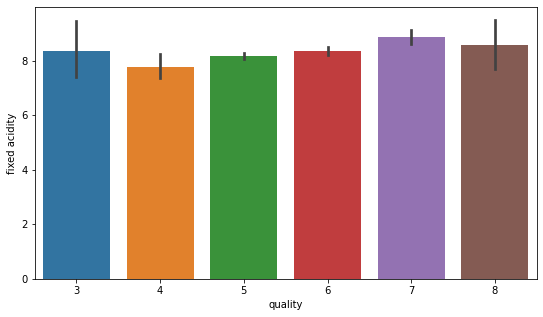

In [166]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

In [167]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)


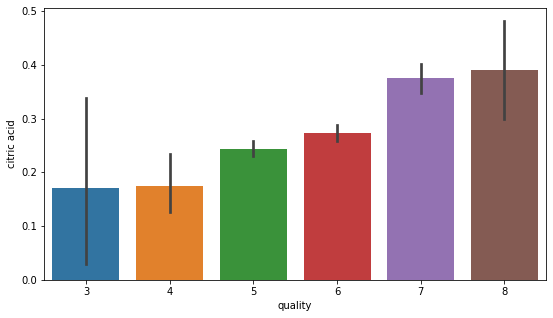

In [168]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

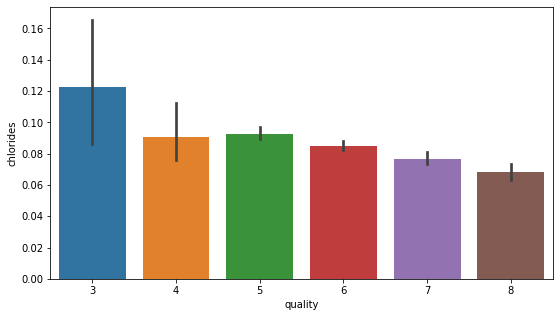

In [169]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

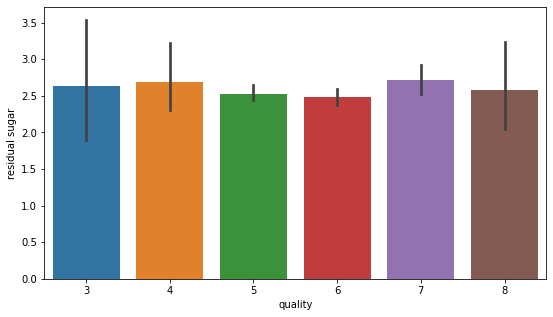

In [170]:
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

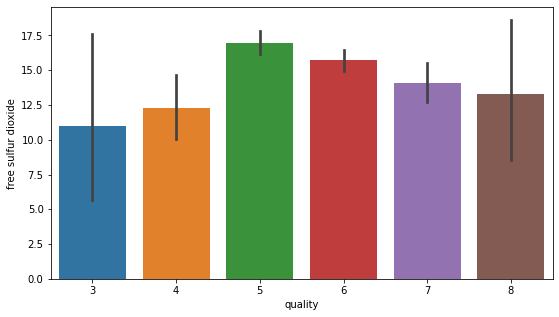

In [171]:
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

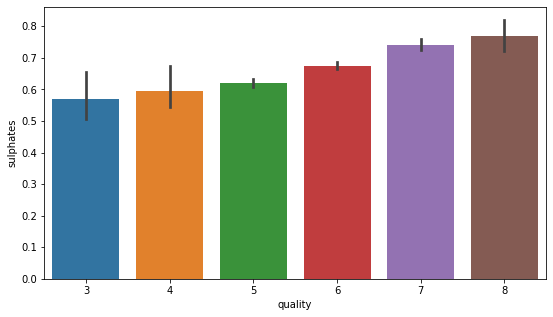

In [172]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

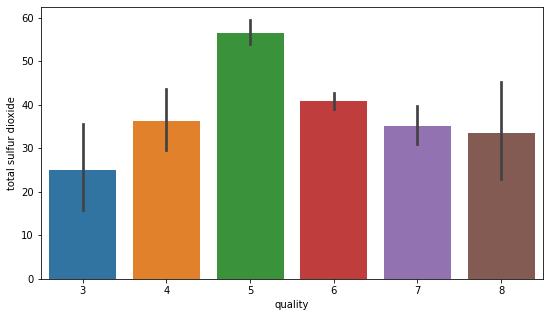

In [173]:
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

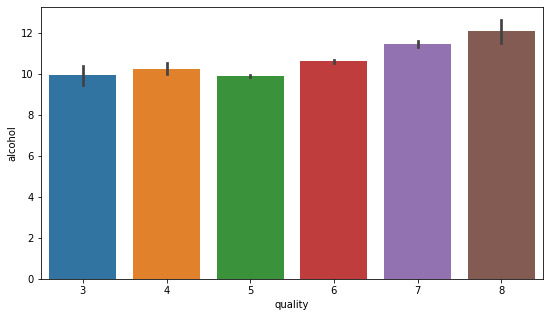

In [174]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [37]:
#cahnge the values between 0 and 1 for easier classification
new=[]
for row in df['quality']:
    if (row<=5):
        val=0
    else:
        val=1
    new.append(val)

In [38]:
df['quality']=new
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

In [39]:
from collections import Counter
print(sorted(Counter(df['quality']).items()))

[(0, 744), (1, 855)]


In [40]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
# #Making binary classificaion for the response variable.

# #Dividing wine as good and bad by giving the limit for the quality
# bins = (2, 6.5, 8)
# group_names = ['bad', 'good']
# df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [64]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
# df.to_csv('new_data.csv')

In [65]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [69]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


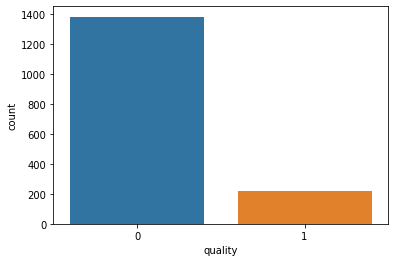

In [67]:
sns.countplot(df['quality'])

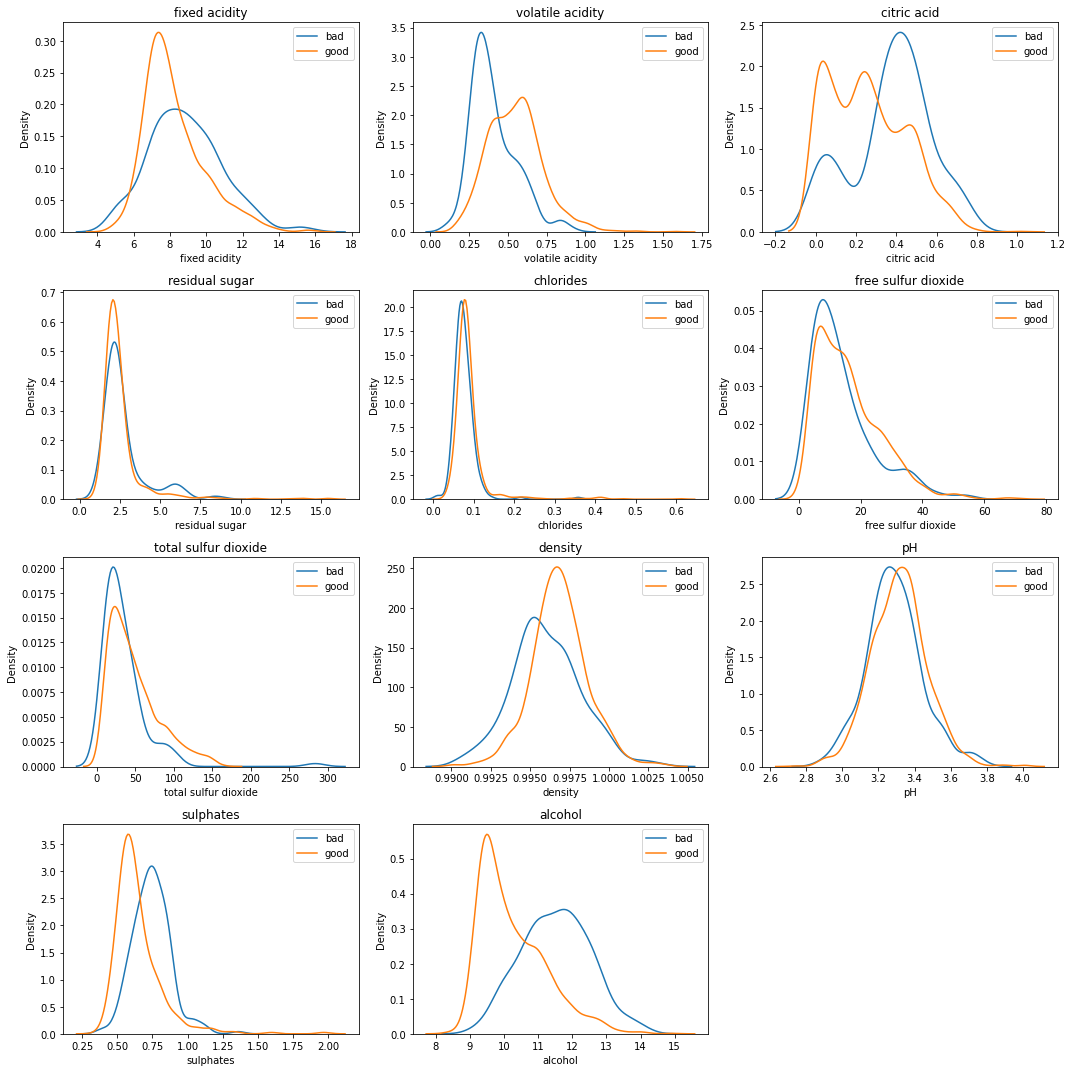

In [68]:
bad_quality=df.query("quality ==1")
good_quality=df.query("quality==0")

plt.figure(figsize=(15,15))
for ax, col in enumerate(df.columns[:11]):
    plt.subplot(4,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = bad_quality[col], label = "bad")
    sns.kdeplot(x = good_quality[col], label = "good")
    plt.legend()
    plt.tight_layout()

In [70]:
#data centring and scaling
dataset =  pd.DataFrame(df)
y = df['quality']
dr = dataset.drop('quality', axis = 1)
mean = dr - dr.mean(axis = 0)
std = dr.std()
data_centered  = mean/std


In [71]:
#Now seperate the dataset as response variable and feature variabes
X = dataset.drop('quality', axis = 1)


In [72]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 42)

In [73]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [74]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train.shape)
# plsda_test = pd.read_csv('/content/PLSDA_TESTING.csv')
# print(plsda_test.shape)
# plsda_test


(1151, 11)


train accuracy: 1.0 
 test accuracy: 0.8772321428571429


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       406
           1       0.39      0.57      0.47        42

    accuracy                           0.88       448
   macro avg       0.67      0.74      0.70       448
weighted avg       0.90      0.88      0.89       448



confusion matrix for random forest classifier


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


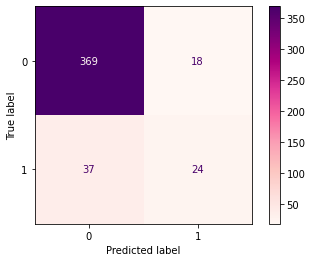

In [75]:
#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(X_train, y_train)
print("train accuracy:",model4.score(X_train, y_train),"\n","test accuracy:",model4.score(X_test,y_test))

rfpred = rf.predict(X_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, X_test, y_test ,cmap=plt.cm.RdPu , values_format='d')

# we can see that dataet is not balanced. to overcome this problem we can use oversampling or undersampling. since low class have small number of observations here I am using oversampling techinque.

In [77]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
y_plsda = pd.read_csv('/content/plsda_test_final.csv')
x_train1,x_test,y_train1,y_test=train_test_split(X,y,test_size=0.2821,random_state=42)


# now we need to work on the imbalanced data and do some sampling to reduce the outliers

In [79]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)

# # y_train.to_csv("new_b_y.csv")
# # x_train.to_csv("new_balanc_data.csv")
# dr = pd.read_csv("/content/new_b_y.csv")
# dr['newquality'] = dr['newquality'].map({2:'good', 1: 'bad'})
# # Display modified DataFrame
# print("Modified DataFrame:\n",dr)
# dr.to_csv('new_y.csv')
# X_train.to_csv('new_balanced data.csv')
# X_test.to_csv('new_test_balanced')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


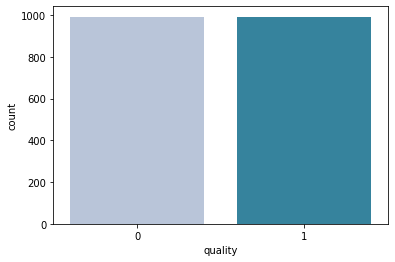

In [80]:
sns.countplot(y_train,palette='PuBuGn')


train accuracy: 1.0 
 test accuracy: 0.8827433628318584


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       367
           1       0.76      0.55      0.64        85

    accuracy                           0.88       452
   macro avg       0.83      0.76      0.78       452
weighted avg       0.88      0.88      0.88       452



confusion matrix for random forest classifier


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


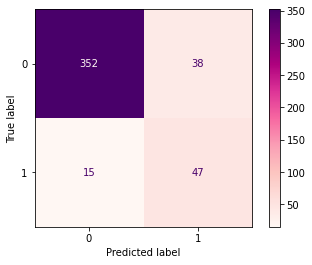

In [81]:
#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.8761061946902655


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.83      0.38      0.52       366
           1       0.20      0.66      0.31        86

    accuracy                           0.44       452
   macro avg       0.51      0.52      0.42       452
weighted avg       0.71      0.44      0.48       452



confusion matrix for random forest classifier


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


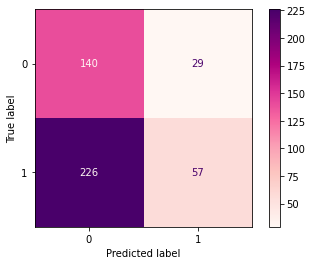

In [82]:
#libraries for model evaluation for the PSDA testing set
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_plsda))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_plsda ,cmap=plt.cm.RdPu , values_format='d')

train accuracy: 0.9964717741935484 
 test accuracy: 0.8628318584070797


classification report for bagging classifier
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       372
           1       0.65      0.50      0.56        80

    accuracy                           0.86       452
   macro avg       0.77      0.72      0.74       452
weighted avg       0.85      0.86      0.86       452



confusion matrix for bagging classifier


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


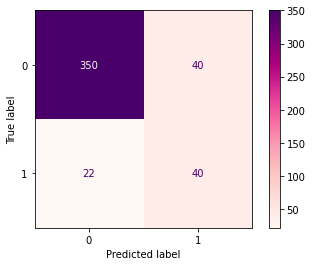

In [83]:
#bagging classifier
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')

train accuracy: 0.9959677419354839 
 test accuracy: 0.8650442477876106


classification report for bagging classifier
              precision    recall  f1-score   support

           0       0.81      0.37      0.51       367
           1       0.19      0.62      0.29        85

    accuracy                           0.42       452
   macro avg       0.50      0.50      0.40       452
weighted avg       0.69      0.42      0.47       452



confusion matrix for bagging classifier


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


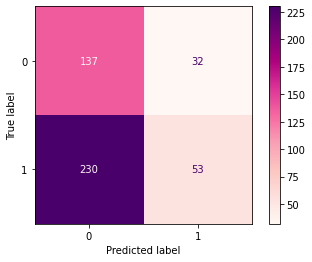

In [84]:
#bagging classifier for PLSDA testing set
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_plsda))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_plsda ,cmap=plt.cm.RdPu , values_format='d')